In [1]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163343 sha256=678fcf7ce24c554d683965f4aa667a052358e2cd01fb4626604f5b2e06b5f16d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNWithZScore, BaselineOnly
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

data = Dataset.load_builtin('ml-100k')



Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
#Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір.
svd = SVD()
svdpp = SVDpp()
nmf = NMF()
knn_with_zscore = KNNWithZScore()
baseline_only = BaselineOnly()

In [5]:
#Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації.
cv_svd = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=True)
cv_nmf = cross_validate(nmf, data, measures=['RMSE'], cv=5, verbose=True)
cv_knn_with_zscore = cross_validate(knn_with_zscore, data, measures=['RMSE'], cv=5, verbose=True)
cv_baseline_only = cross_validate(baseline_only, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9426  0.9420  0.9330  0.9307  0.9330  0.9363  0.0050  
Fit time          2.16    1.95    1.30    1.86    1.48    1.75    0.32    
Test time         0.22    0.20    0.12    0.22    0.19    0.19    0.04    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9236  0.9162  0.9187  0.9238  0.9181  0.9201  0.0031  
Fit time          26.72   30.22   26.51   27.54   27.75   27.75   1.32    
Test time         4.07    4.37    4.11    4.35    5.52    4.48    0.53    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9649  0.9567  0.9616  0.9642  0.9632  0.0039  
Fit time          1.99    1.99    1.99    1.95    2.59    2.10    0.25    
Test time         0.10    

In [8]:
svd_rmse = cv_svd['test_rmse'].mean()
svdpp_rmse = cv_svdpp['test_rmse'].mean()
nmf_rmse = cv_nmf['test_rmse'].mean()
knn_with_zscore_rmse = cv_knn_with_zscore['test_rmse'].mean()
baseline_only_rmse = cv_baseline_only['test_rmse'].mean()

print("SVD RMSE:", svd_rmse)
print("SVD++ RMSE:", svdpp_rmse)
print("NMF RMSE:", nmf_rmse)
print("KNNWithZScore RMSE:", knn_with_zscore_rmse)
print("BaselineOnly RMSE:", baseline_only_rmse)



SVD RMSE: 0.9362746128105301
SVD++ RMSE: 0.9201040848754577
NMF RMSE: 0.9632046332429498
KNNWithZScore RMSE: 0.9509914306106311
BaselineOnly RMSE: 0.9435415456582981


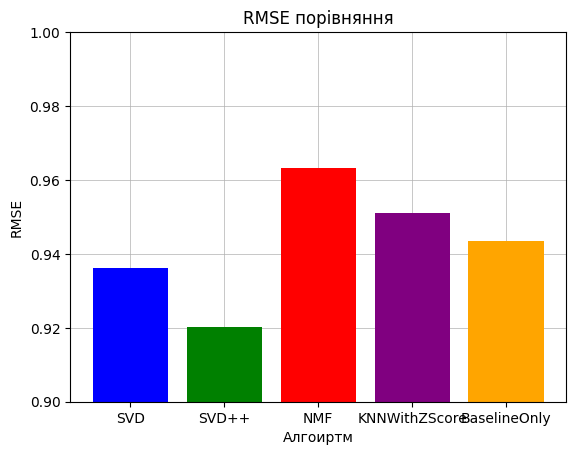

In [12]:
rmse_values = [svd_rmse, svdpp_rmse, nmf_rmse, knn_with_zscore_rmse, baseline_only_rmse]
algos = ['SVD', 'SVD++', 'NMF', 'KNNWithZScore', 'BaselineOnly']

plt.bar(algos, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Алгоиртм')
plt.ylabel("RMSE")
plt.title('RMSE порівняння')
plt.ylim(0.9, 1.0)
plt.gca().set_axisbelow(True)
plt.grid(linewidth=0.5)
plt.show()